# Data Augmentation using GAN

In this notebook, we will implement data augmentation techniques using Generative Adversarial Networks (GANs) to enhance the HAM10000 dataset for skin cancer classification.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, LeakyReLU, Reshape, UpSampling2D, BatchNormalization
from keras.optimizers import Adam
from keras import backend as K



## Load the Dataset

We will load the images and the corresponding masks from the dataset.

In [4]:
# Load images and masks
image_dir = '../data/images/'
mask_dir = '../data/masks/'
images = []
masks = []

for filename in os.listdir(image_dir):
    img = cv2.imread(os.path.join(image_dir, filename))
    images.append(img)
    mask = cv2.imread(os.path.join(mask_dir, filename), cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)


C:\Users\Asus\AppData\Local\Temp\ipykernel_27736\1633631666.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


## Data Augmentation with GAN

We will define and train a GAN model to generate augmented images.

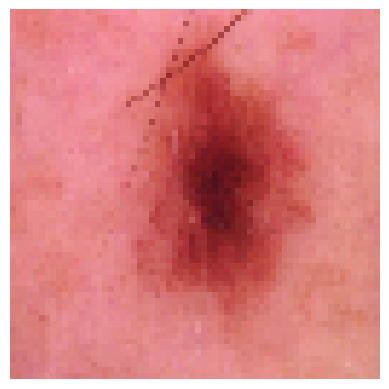

1/1 [==============================] - 0s 62ms/step
0 [D loss: 0.6936, acc.: 46.88%] [G loss: 1.1199]
1/1 [==============================] - 0s 23ms/step
100 [D loss: 0.7117, acc.: 50.00%] [G loss: 0.8687]
1/1 [==============================] - 0s 25ms/step
200 [D loss: 0.6341, acc.: 50.00%] [G loss: 3.5222]
1/1 [==============================] - 0s 24ms/step
300 [D loss: 4.3594, acc.: 50.00%] [G loss: 11.3405]
1/1 [==============================] - 0s 25ms/step
400 [D loss: 1.8589, acc.: 75.00%] [G loss: 15.9433]
1/1 [==============================] - 0s 25ms/step
500 [D loss: 9.9827, acc.: 50.00%] [G loss: 2.0700]
1/1 [==============================] - 0s 24ms/step
600 [D loss: 0.6417, acc.: 93.75%] [G loss: 49.9865]
1/1 [==============================] - 0s 23ms/step
700 [D loss: 2.5528, acc.: 56.25%] [G loss: 20.4343]
1/1 [==============================] - 0s 23ms/step
800 [D loss: 0.3412, acc.: 68.75%] [G loss: 7.5220]
1/1 [==============================] - 0s 23ms/step
900 [D los

In [11]:
import os
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt  # Required for image display
from sklearn.model_selection import train_test_split

# === STEP 1: Load and preprocess images ===
data_dir = r'C:\Users\Asus\deeplearning-ham10000-workshop\data'
images_dir = os.path.join(data_dir, 'images')

images = []
for filename in os.listdir(images_dir):
    if filename.lower().endswith(('.jpg', '.png')):
        img_path = os.path.join(images_dir, filename)
        img = cv2.imread(img_path)

        if img is None:
            continue  # Skip unreadable files

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV loads in BGR, convert to RGB
        img = cv2.resize(img, (64, 64))  # Resize to match GAN input
        img = img / 127.5 - 1  # Normalize to [-1, 1]
        images.append(img)

images = np.array(images)

# === STEP 2: Add GAN class path and import ===
sys.path.append(r"C:\Users\Asus\deeplearning-ham10000-workshop\src\data_augmentation")
from gan import GAN

# === STEP 3: Initialize GAN ===
gan = GAN(img_shape=images[0].shape)

# === STEP 4: Preview a sample image (re-scaled for display) ===
plt.imshow((images[0] + 1) / 2)  # From [-1, 1] → [0, 1] for display
plt.axis('off')
plt.show()

# === STEP 5: Train the GAN ===
gan.train(images, epochs=10000, batch_size=32)




## Generate Augmented Images

After training the GAN, we can generate new images to augment our dataset.

In [12]:
import os
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt  # ✅ Required for plotting

# Add path to GAN class
sys.path.append(r"C:\Users\Asus\deeplearning-ham10000-workshop\src\data_augmentation")
from gan import GAN

# 4. Generate images
num_augmented_images = 1000
augmented_images = gan.generate(num_augmented_images)

# 5. Define your desired output directory
output_dir = r'C:\Users\Asus\deeplearning-ham10000-workshop\data\augmented'
os.makedirs(output_dir, exist_ok=True)

# 6. Save the generated images
for i, img in enumerate(augmented_images):
    img = ((img + 1) * 127.5).astype(np.uint8)  # Convert from [-1, 1] to [0, 255]
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    save_path = os.path.join(output_dir, f'aug_{i}.png')
    cv2.imwrite(save_path, img_bgr)



32/32 [==============================] - 1s 18ms/step


## Conclusion

In this notebook, we implemented data augmentation using GANs to enhance the HAM10000 dataset. The generated images can be used to improve the performance of our deep learning models.